In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_r1 = "../../data/EGFR/result_summary_round1.csv"
path_r2 = "../../data/EGFR/result_summary_round2.csv"

df_r1 = pd.read_csv(path_r1)
df_r2 = pd.read_csv(path_r2)

In [3]:
df_egfr = pd.concat([df_r1, df_r2], ignore_index=True)
display(df_egfr.head())
print(f"Total Designs Tested: {len(df_egfr)}")
print("Columns:", df_egfr.columns.tolist())

,name,username,sequence_name,kd,sequence,dna,plddt,pae_interaction,similarity_check,model_names,methods
0,Cetuximab_scFv,NaN,NaN,6.638345e-09,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...,ATGCAGGTGCAGCTGAAACAGAGCGGCCCGGGCCTGGTGCAGCCAT...,NaN,NaN,NaN,NaN,NaN
1,ahmedsameh-Q3,ahmedsameh,Q3,3.694188e-08,WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,ATGTGGGTGCAGCTGCAGGAAAGCGGCGGCGGCTTAGTGCAACCAG...,77.840455,28.217942,0.992,"[""Rosetta""]","[""Physics Based""]"
2,ahmedsameh-yy2,ahmedsameh,yy2,6.275390e-08,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQRE...,ATGCAGGTGCAGCTGCAGGAAAGCGGCGGCGGCTTAGTGCAACCAG...,77.288939,28.177070,0.992,"[""Rosetta""]","[""Physics Based""]"
3,martin.pacesa-EGFR_l138_s90285_mpnn2,martin.pacesa,EGFR_l138_s90285_mpnn2,4.909414e-07,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...,ATGAGCCCGTTTGATCTGTTTCTGGATCGCCTGCCGGAACAGGATC...,88.653551,16.878782,NaN,"[""AF2 Backprop""]","[""Hallucination""]"
4,x.rustamov-m_18_41,x.rustamov,m_18_41,4.773972e-06,SAGQAQIEEVKARADKAKTLEELKELRKEAYEKNWKAYMAVVDETE...,ATGAGCGCGGGCCAGGCGCAGATTGAAGAAGTGAAAGCGCGCGCAG...,89.580600,14.921833,NaN,"[""AF2 Backprop""]","[""Hallucination""]"


Total Designs Tested: 404
Columns: ['name', 'username', 'sequence_name', 'kd', 'sequence', 'dna', 'plddt', 'pae_interaction', 'similarity_check', 'model_names', 'methods']


Total Designs: 404
Confirmed Binders: 16 (3.96%)


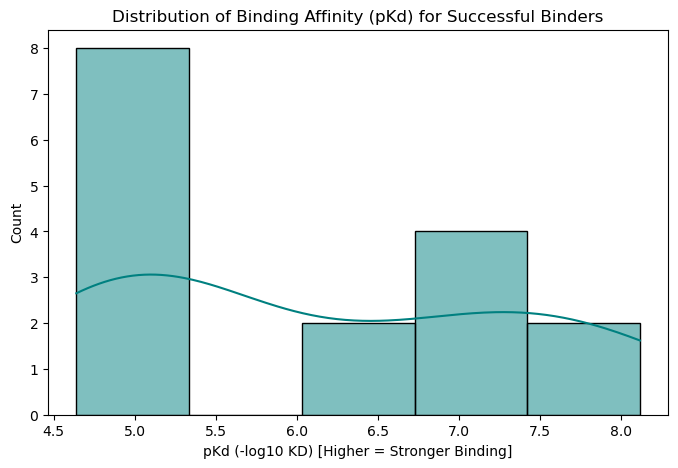

In [9]:
df_egfr['kd'] = pd.to_numeric(df_egfr['kd'], errors='coerce')

df_egfr['is_binder'] = df_egfr['kd'].notnull()

valid_binders = df_egfr[df_egfr['is_binder'] == True].copy()

valid_binders['pKd'] = -np.log10(valid_binders['kd'] + 1e-9)


print(f"Total Designs: {len(df_egfr)}")
print(f"Confirmed Binders: {len(valid_binders)} ({len(valid_binders)/len(df_egfr):.2%})")

plt.figure(figsize=(8, 5))
sns.histplot(valid_binders['pKd'], kde=True, color='teal')
plt.title('Distribution of Binding Affinity (pKd) for Successful Binders')
plt.xlabel('pKd (-log10 KD) [Higher = Stronger Binding]')
plt.show()

Missing values in metrics:
 plddt                 2
pae_interaction       2
similarity_check    256
dtype: int64


C:\Users\Jan R\AppData\Local\Temp\ipykernel_6876\3611447518.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_binder', y='plddt', data=df_egfr, palette='coolwarm')
C:\Users\Jan R\AppData\Local\Temp\ipykernel_6876\3611447518.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_binder', y='pae_interaction', data=df_egfr, palette='coolwarm')


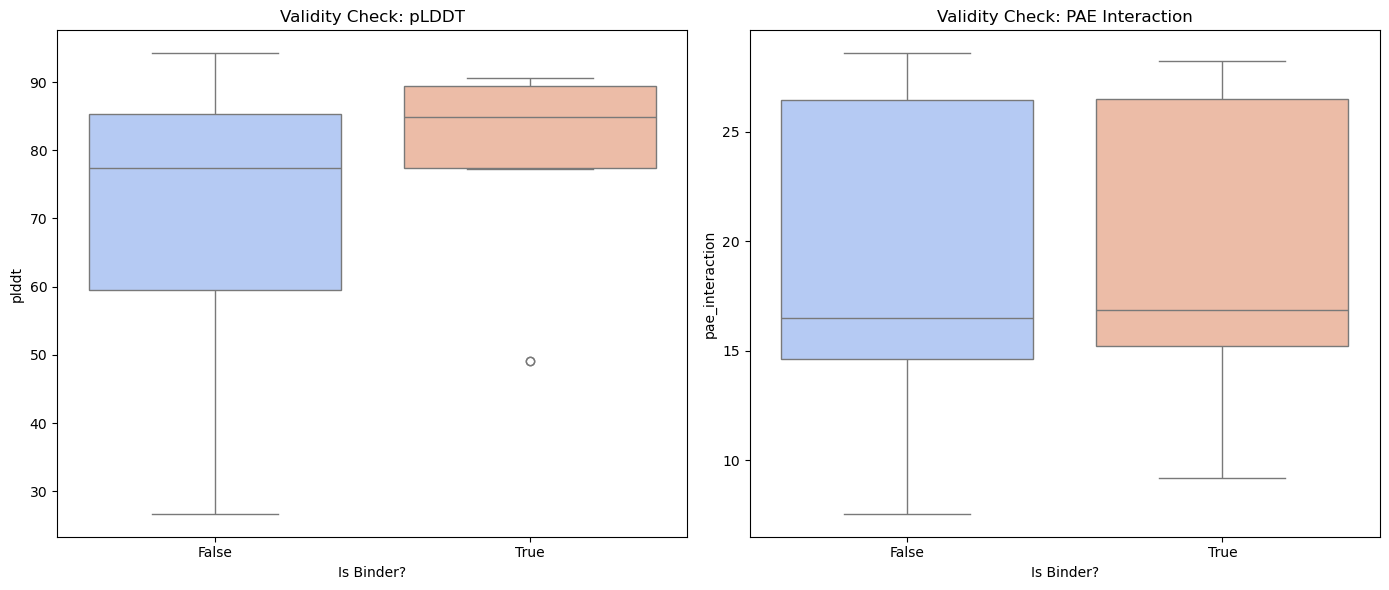

In [10]:
metrics = ['plddt', 'pae_interaction', 'similarity_check']

print("Missing values in metrics:\n", df_egfr[metrics].isnull().sum())

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='is_binder', y='plddt', data=df_egfr, palette='coolwarm')
plt.title('Validity Check: pLDDT')
plt.xlabel('Is Binder?')


plt.subplot(1, 2, 2)
sns.boxplot(x='is_binder', y='pae_interaction', data=df_egfr, palette='coolwarm')
plt.title('Validity Check: PAE Interaction')
plt.xlabel('Is Binder?')

plt.tight_layout()
plt.show()

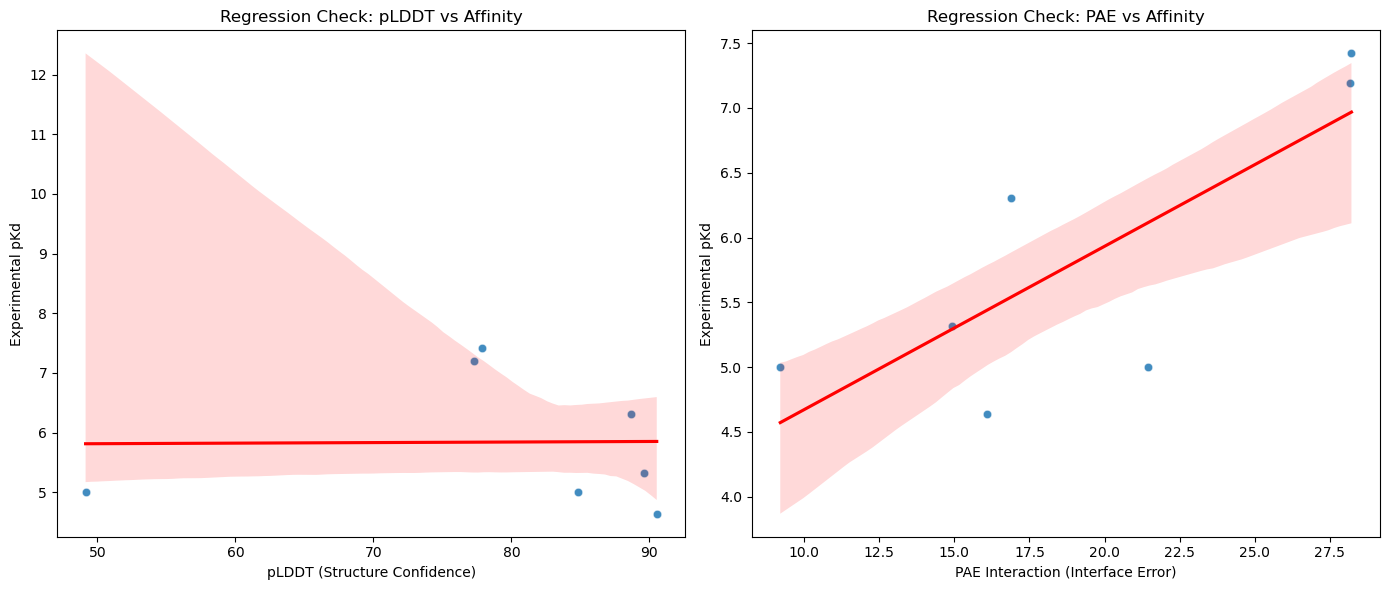

Correlation Matrix (Metric vs Affinity):


,pKd
pKd,1.000000
plddt,0.011993
pae_interaction,0.787833
similarity_check,0.926423


In [11]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(data=valid_binders, x='plddt', y='pKd', alpha=0.6)
sns.regplot(data=valid_binders, x='plddt', y='pKd', scatter=False, color='red')
plt.title('Regression Check: pLDDT vs Affinity')
plt.xlabel('pLDDT (Structure Confidence)')
plt.ylabel('Experimental pKd')

plt.subplot(1, 2, 2)
sns.scatterplot(data=valid_binders, x='pae_interaction', y='pKd', alpha=0.6)
sns.regplot(data=valid_binders, x='pae_interaction', y='pKd', scatter=False, color='red')
plt.title('Regression Check: PAE vs Affinity')
plt.xlabel('PAE Interaction (Interface Error)')
plt.ylabel('Experimental pKd')

plt.tight_layout()
plt.show()

correlation = valid_binders[['pKd', 'plddt', 'pae_interaction', 'similarity_check']].corr()
print("Correlation Matrix (Metric vs Affinity):")
display(correlation[['pKd']])